# Lecture 03: Data Visualization: Bar plot

Instructor:
<br>Md Shahidullah Kawsar
<br>Data Scientist
<br>IDARE, Houston, TX, USA

#### Objectives:
- Familiarity with matplotlib and seaborn
- Data Analysis using NumPy and Pandas
- How to find the number of unique values present in the DataFrame?
- How to rename a column name is pandas DataFrame?
- How to round the numeric values in a pandas column?
- How to change the index of a DataFrame?
- How to write functions in Python?
- Data Visualization: Bar plot
- How to change the context of a plot?
- How to create subplots?
- How to set a title, xlabel and ylabel of a plot?
- How to change the range of x and y axis?
- How to rotate the x and y tick labels?

#### References:
[1] https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
<br>[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
<br>[3] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
<br>[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html
<br>[5] https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
<br>[6] https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
<br>[7] https://seaborn.pydata.org/generated/seaborn.barplot.html
<br>[8] https://seaborn.pydata.org/generated/seaborn.set_context.html

#### Import required libraries and packages

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [88]:
df = pd.read_csv("bmw.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0
...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,64.2,2.0


#### Check for missing values, data types of the columns

In [89]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


None

#### Count the number of unique values present in the 'year' column

In [90]:
year_count = df['year'].value_counts()
display(year_count)

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2005       6
2002       6
1999       4
2001       3
2000       2
2003       2
1997       1
1998       1
1996       1
Name: year, dtype: int64

#### Count the number of unique values present in the 'model' column

In [91]:
model_count = df['model'].value_counts()
display(model_count)

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 X6           106
 7 Series     106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

#### Count the number of unique values present in the 'transmission' column

In [92]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

#### Count the number of unique values present in the 'fuelType' column

In [93]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

#### Find the percentage of unique values present in the 'fuelType' column

In [94]:
fuelType_count = df['fuelType'].value_counts()
# print(type(fuelType_count))

fuelType_count = pd.DataFrame(fuelType_count)
# display(fuelType_count)

fuelType_count = fuelType_count.reset_index()
# display(fuelType_count)

fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})
# display(fuelType_count)

# print(fuelType_count['No_of_cars'].sum())

fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100), 2)
display(fuelType_count)

# print(type(fuelType_count))

,fuel_type,No_of_cars,% of cars
0,Diesel,7027,65.18
1,Petrol,3417,31.69
2,Hybrid,298,2.76
3,Other,36,0.33
4,Electric,3,0.03


#### Create a Barplot for the 'fuelType' column

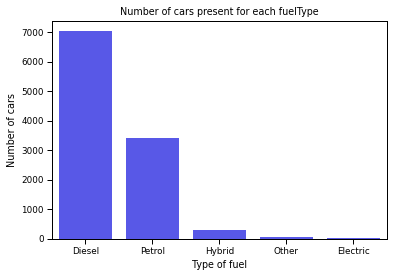

In [95]:
sns.barplot(x='fuel_type', y='No_of_cars', data=fuelType_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")
# plt.grid()
plt.show()

#### Find the percentage of unique values present in the 'transmission' column

In [96]:
transmission_count = df['transmission'].value_counts()
# print(type(transmission_count))

transmission_count = pd.DataFrame(transmission_count)
# display(transmission_count)

transmission_count = transmission_count.reset_index()
# display(transmission_count)

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})
# display(transmission_count)

# print(transmission_count['No_of_cars'].sum())

transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)

# print(type(transmission_count))

,transmission,No_of_cars,% of cars
0,Semi-Auto,4666,43.28
1,Automatic,3588,33.28
2,Manual,2527,23.44


#### Create a Barplot for the 'transmission' column

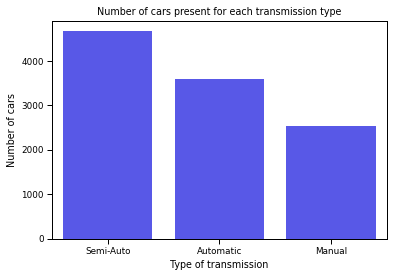

In [97]:
sns.barplot(x='transmission', y='No_of_cars', data=transmission_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.show()

#### Find the percentage of unique values present in the 'model' column

In [98]:
model_count = df['model'].value_counts()
# print(type(model_count))

model_count = pd.DataFrame(model_count)
# display(model_count)

model_count = model_count.reset_index()
# display(model_count)

model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})
# display(model_count)

# print(model_count['No_of_cars'].sum())

model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)

# print(type(model_count))

,model,No_of_cars,% of cars
0,3 Series,2443,22.66
1,1 Series,1969,18.26
2,2 Series,1229,11.40
3,5 Series,1056,9.80
4,4 Series,995,9.23
5,X1,804,7.46
6,X3,551,5.11
7,X5,468,4.34
8,X2,288,2.67
9,X4,179,1.66


#### Create a Barplot for the 'model' column

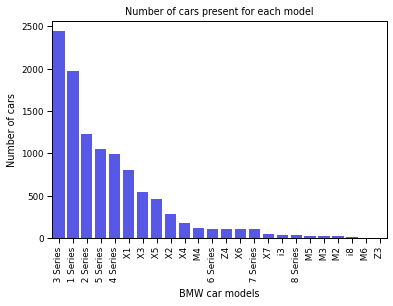

In [99]:
sns.barplot(x='model', y='No_of_cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("BMW car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

#### Can you plot the above barplots side by side?

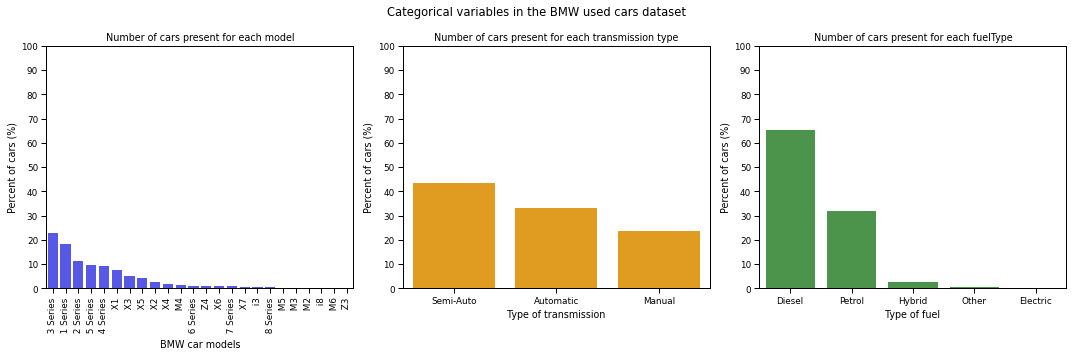

In [100]:
sns.set_context('paper')

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("BMW car models")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10).tolist())

plt.subplot(1,3,2)
sns.barplot(x='transmission', y='% of cars', data=transmission_count, color='orange')
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())

plt.subplot(1,3,3)
sns.barplot(x='fuel_type', y='% of cars', data=fuelType_count, color='green', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Percent of cars (%)")
plt.yticks(np.arange(0,101,10).tolist())

plt.suptitle("Categorical variables in the BMW used cars dataset")
plt.tight_layout()
plt.show()

#### Create a function to find the number of observations for unique value in a column of a DataFrame

In [101]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [102]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [103]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

#### Create a function to show the number of observations for each unique value in a column using a barplot

In [104]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Number of cars present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

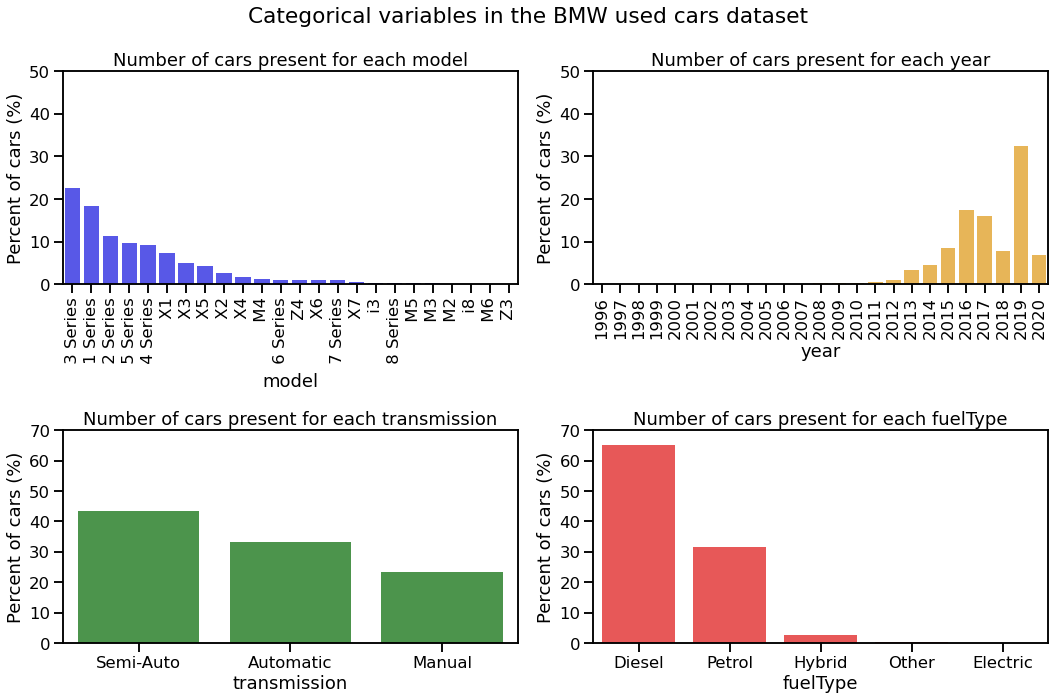

In [105]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the BMW used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()